In [45]:
import numpy as np
import pickle
from cmaes import SepCMA, CMA
import sys
import os
from matplotlib import animation
import matplotlib.pyplot as plt
import gym 

sys.path.insert(0,'rendering_files/')

from rendering_files.level_utils import load_level_from_text
from rendering_files.level_image_gen import LevelImageGen

In [2]:
def get_map(prize, obstacle, map_lim):
    generated_map = np.zeros((map_lim, map_lim)) 
    for o in obstacle:
        o_r = o // map_lim
        o_c = o % map_lim
        generated_map[o_r][o_c] = 1
        
    for p in prize:
        p_r = p // map_lim
        p_c = p % map_lim
        generated_map[p_r][p_c] = 2
    
    return generated_map

In [3]:
map_lim = 10
N_population = 10
N_Prize = 3
N_Obstacle = 10
N = N_Obstacle + N_Prize
bounds = np.array([[0, map_lim**2 - 1]]*N)
lower_bounds, upper_bounds = bounds[:, 0], bounds[:, 1]

mean = lower_bounds + (np.random.rand(N) * (upper_bounds - lower_bounds))
sigma = 1.0 #upper_bounds / 4.0 
optimizer = SepCMA(mean=mean, sigma=sigma, bounds=bounds, population_size=N_population, seed=None)
x = optimizer.ask()
indices = np.clip(np.round(x), 0, map_lim**2).astype(int)
prize_indices = indices[0:N_Prize]
obstacle_indices = indices[N_Prize:]
generated_map = get_map(prize_indices, obstacle_indices, map_lim)


array([[0., 0., 0., 0., 1., 0., 0., 1., 0., 2.],
       [0., 0., 0., 0., 0., 0., 1., 2., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
map_lim = 20
name = "map_0"
ImgGen = LevelImageGen("rendering_files/sprites")
lvl = load_level_from_text("created_maps/" + name + ".txt")
if lvl[-1][-1] == '\n':
    lvl[-1] = lvl[-1][0:-1]
lvl_img = ImgGen.render(lvl)
lvl_img.save(os.path.join("created_maps/images/", name + '.png'), format='png')

In [22]:
total_maps = []
lvl = load_level_from_text("target_maps/" + name + ".txt")
current_map = np.zeros((map_lim, map_lim))
for r in range(map_lim):
    for c in range(map_lim):
        if lvl[r][c] == '-':
            current_map[r][c] = 0
        elif lvl[r][c] == 'W':
            current_map[r][c] = 1
        elif lvl[r][c] == 'X':
            current_map[r][c] = 2
total_maps.append(current_map)
N_obstacle = np.sum(total_maps[0] == 1)
N_prize = np.sum(total_maps[0] == 2)

In [23]:
N_obstacle

16

In [6]:
folder_postfix = "15Haziran_PPO_CMA_250k"
iteration = 3

with open(folder_postfix + "_curriculum_iter_" + str(iteration) + ".pickle", 'rb') as handle:
    best_reward_list, best_init_list, best_pop_index_list = pickle.load(handle)
    
best_reward_list

[-1.0299999999999998,
 -1.0299999999999998,
 -1.0299999999999998,
 -1.0299999999999998,
 -1.0299999999999998,
 -1.0299999999999998,
 -1.0299999999999998]

In [8]:
best_init_list

[array([63,  9,  1, 33, 83, 98, 57, 60,  9, 47, 68, 29, 79, 14, 78, 14, 57,
        46, 83], dtype=int64),
 array([63,  9,  0, 34, 81, 99, 58, 61,  9, 47, 67, 30, 79, 13, 77, 14, 58,
        45, 83], dtype=int64),
 array([63,  9,  1, 37, 81, 98, 58, 60,  9, 46, 66, 31, 76, 15, 77, 13, 58,
        46, 83], dtype=int64),
 array([61,  9,  1, 35, 81, 98, 58, 59,  8, 46, 67, 31, 77, 14, 77, 13, 60,
        46, 83], dtype=int64),
 array([61,  9,  3, 35, 81, 98, 59, 58,  7, 46, 67, 31, 75, 13, 77, 13, 59,
        47, 83], dtype=int64)]

In [67]:
prize_indices

array([188, 368, 339])

In [10]:
prize_indices=  [292, 292, 223, 399, 300, 399, 316, 351, 3]
obstacle_indices=  [ 49, 64,89, 108, 399,  66, 259, 203,   1,  62, 148, 270, 205, 251, 253, 399,  97, 220, 319,  97]
name = "map_2"

def create_map_files(map_file, prize_indices, obstacle_indices, map_lim = 20):
    current_map = np.zeros((map_lim, map_lim))
    map_list = []

    for prize in prize_indices:
        r = prize // map_lim
        c = prize % map_lim
        current_map[r][c] = 2
    
    for obs in obstacle_indices:
        r = obs // map_lim
        c = obs % map_lim
        current_map[r][c] = 1

    map_list.append(current_map)

    directory = "created_maps/"
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    
    for ind, current_map in enumerate(map_list):
        matrix = np.asarray([['-' for i in range(map_lim)] for j in range(map_lim)])
        matrix[current_map == 1] = 'W'
        matrix[current_map == 2] = 'X'
        

        with open(directory + "/" + map_file + ".txt", "w") as txt_file:
            for line in matrix:
                txt_file.write("".join(line) + "\n") # works with any number of elements in a line

create_map_files(name, prize_indices, obstacle_indices)

ImgGen = LevelImageGen("rendering_files/sprites")
lvl = load_level_from_text("created_maps/" + name + ".txt")
if lvl[-1][-1] == '\n':
    lvl[-1] = lvl[-1][0:-1]
lvl_img = ImgGen.render(lvl)
lvl_img.save(os.path.join("created_maps/images/", name + '.png'), format='png')

In [44]:
from PIL import Image, ImageOps, ImageEnhance

sprite_path = "rendering_files/sprites/"
mapsheet = Image.open(os.path.join(sprite_path, 'smallmariosheet.png'))
prize = mapsheet.crop((4*16, 0*16, 5*16, 1*16))
prize.save('mario3.png')
prize

MovieWriter imagemagick unavailable; using Pillow instead.


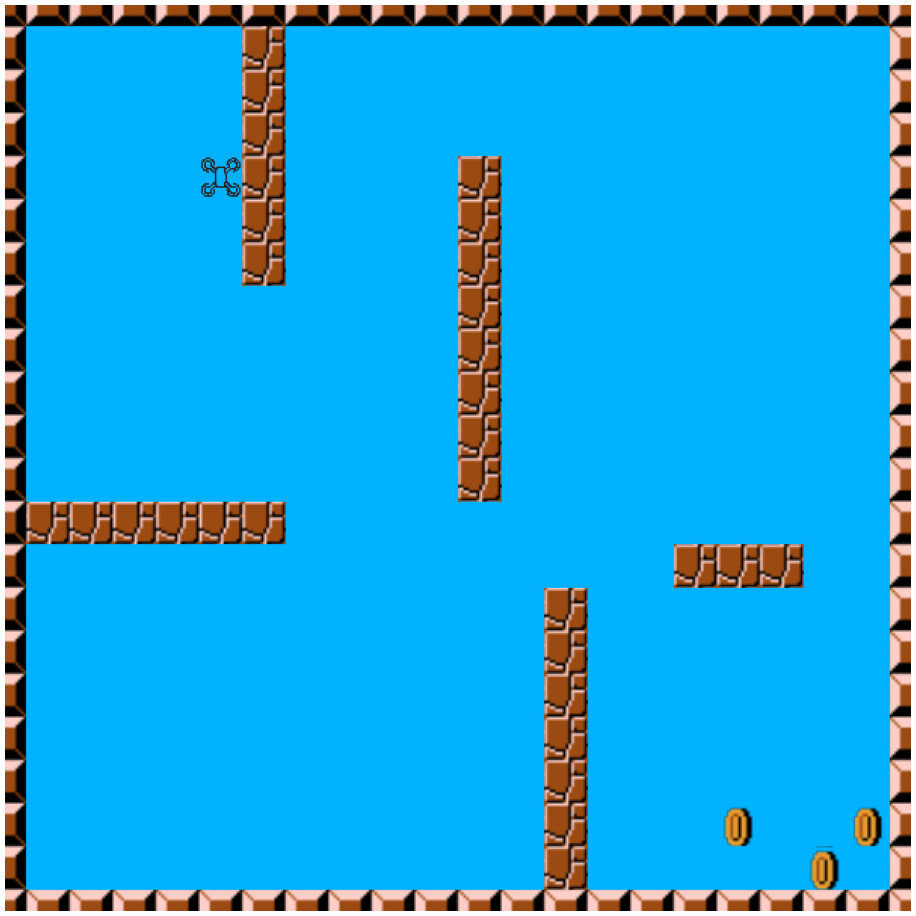

In [60]:
with open('frames_2.pickle', 'rb') as handle:
    frames = pickle.load(handle)

filename = "gym_anim_2.gif"
#Mess with this to change frame size
plt.figure(figsize=(frames[0].shape[1] / 25.0, frames[0].shape[0] / 25.0), dpi=50)

patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
anim.save(filename, writer='imagemagick', fps=10)

In [50]:
frames[0].shape[1]

300